## Temperature Change Analysis And Prediction

### Project Details: 
The Project involves understanding,analysis and comparision of the temperature data and to predict the temperature of a day using the past data using linear Regression and Random Forest.

### Abstract:
The dataset contains 96453 data points from 0 to 96452 collected from a Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:

1) time
2) Summary
3) PrecipType
4) Temperature
5) ApparentTemperature
6) Humidity
7) WindSpeed
8) WindBearing
9) Visibility
10) loudCover
11) Pressure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('weatherHistory.csv')

In [3]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)

In [7]:
df['year']=df['Formatted Date'].dt.year
df['month']=df['Formatted Date'].dt.month
df['day']=df['Formatted Date'].dt.day

In [8]:
df.rename(columns={'Temperature (C)':'Temperature','Apparent Temperature (C)':'Apparent Temperature'},inplace=True)

In [9]:
df.head(8)

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,2006,4,1
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,2006,4,1
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,2006,4,1


In [10]:
df.describe()

,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),year,month,day
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.00000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,2011.00029,6.523001,15.727100
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,3.16216,3.448501,8.802216
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2005.00000,1.000000,1.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,2008.00000,4.000000,8.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,2011.00000,7.000000,16.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,2014.00000,10.000000,23.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,2016.00000,12.000000,31.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

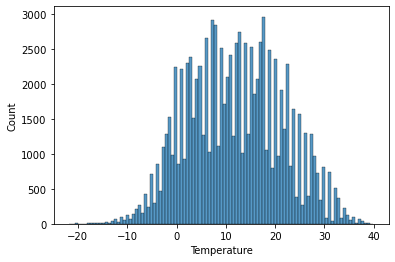

In [12]:
sns.histplot(df['Temperature'])

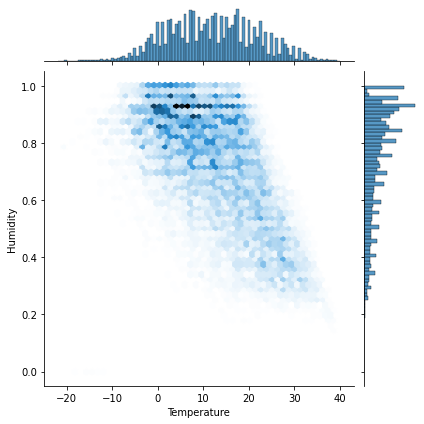

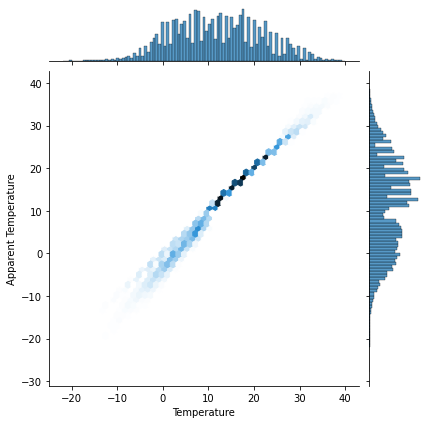

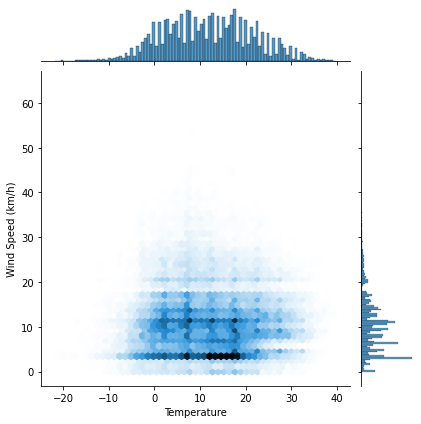

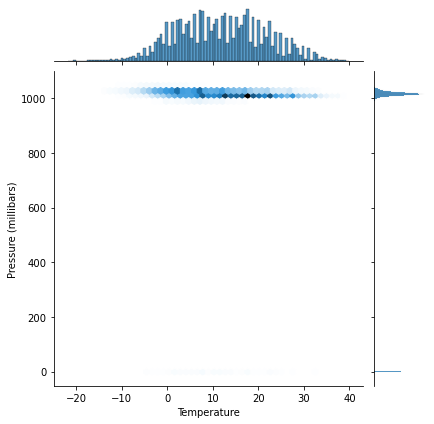

In [13]:
#Target variable vs Factors
sns.jointplot(x='Temperature',y='Humidity',data=df,kind='hex')
sns.jointplot(x='Temperature',y='Apparent Temperature',data=df,kind='hex')
sns.jointplot(x='Temperature',y='Wind Speed (km/h)',data=df,kind='hex')
sns.jointplot(x='Temperature',y='Pressure (millibars)',data=df,kind='hex')

(11.0, 0.0)

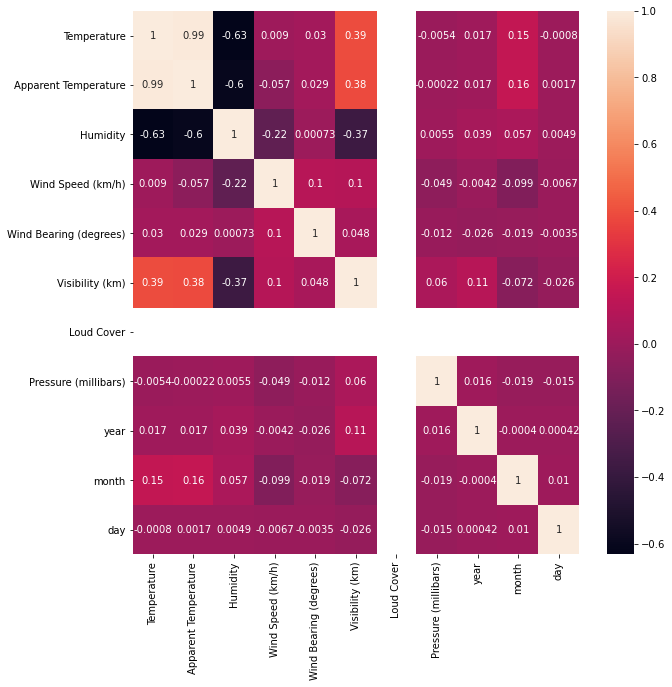

In [14]:
#plotting the heatmap to check the corelation
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),annot=True)
ax.set_ylim(11,0)

In [15]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1


In [16]:
x=df.iloc[:,4:10]
y=df.iloc[:,3]

In [17]:
#splitting the training and testing data set as 80% and 20% respectively
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=100)

In [18]:
(xtest)

,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover
48732,22.200000,0.76,12.3165,311.0,11.2700,0.0
20867,1.644444,0.61,14.2968,281.0,8.1305,0.0
87385,14.422222,0.96,3.0429,244.0,3.9123,0.0
21561,12.777778,0.96,14.3934,292.0,11.0446,0.0
30624,21.666667,0.71,17.7100,320.0,16.1000,0.0
...,...,...,...,...,...,...
163,14.050000,0.63,9.1609,160.0,9.9820,0.0
23445,10.477778,0.68,14.0392,20.0,15.8263,0.0
38287,-1.316667,0.93,3.3971,246.0,1.4168,0.0
84887,11.455556,0.79,11.2700,50.0,16.1000,0.0


In [19]:
ytest

48732    22.200000
20867     4.811111
87385    14.422222
21561    12.777778
30624    21.666667
           ...    
163      14.050000
23445    10.477778
38287    -1.316667
84887    11.455556
69635    16.188889
Name: Temperature, Length: 19291, dtype: float64

In [20]:
xtrain

,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover
87554,18.666667,0.93,2.8014,140.0,9.9820,0.0
58483,23.155556,0.37,2.8014,73.0,10.3684,0.0
31470,-3.972222,0.85,12.8800,160.0,9.9820,0.0
9482,5.738889,0.70,7.1484,249.0,14.9569,0.0
46344,-0.650000,0.85,16.7279,38.0,6.0214,0.0
...,...,...,...,...,...,...
65615,18.861111,0.79,6.3273,308.0,15.3111,0.0
77655,12.800000,0.96,14.8120,320.0,10.2557,0.0
79683,17.205556,0.81,1.6100,284.0,16.1000,0.0
56088,-13.733333,0.77,6.4400,150.0,16.1000,0.0


In [21]:
ytrain

87554    18.666667
58483    23.155556
31470     0.000000
9482      7.022222
46344     3.261111
           ...    
65615    18.861111
77655    12.800000
79683    17.205556
56088   -10.000000
38408    -7.377778
Name: Temperature, Length: 77162, dtype: float64

<b> Linear Regression Implementation </b>

In [22]:
model=LinearRegression()

In [23]:
model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
model.intercept_

2.6364964212773287

In [25]:
model.coef_

array([ 8.72460394e-01, -1.42117574e+00,  7.98272688e-02, -4.01282140e-04,
        7.77829732e-03,  0.00000000e+00])

In [26]:
prediction=model.predict(xtest)
print(prediction)

[21.87107881  4.29604753 14.03040997 ...  0.34954956 12.51310589
 16.87518259]


Text(0, 0.5, 'ytest')

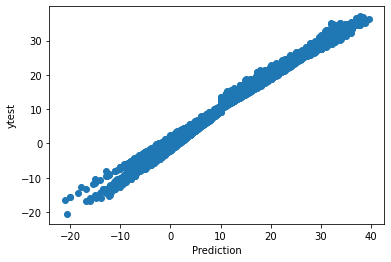

In [27]:
plt.scatter(ytest,prediction)
plt.xlabel('Prediction')
plt.ylabel('ytest')

In [28]:
Accuracy=model.score(xtest,ytest)
print(Accuracy)
print('Accuracy : {:.2f}{}'.format(Accuracy*100,'%'))

0.9901960480837957
Accuracy : 99.02%


In [29]:
from sklearn import metrics
metrics.mean_squared_error(ytest,prediction)

0.8807938824860301


<b> Applying Lasso regularisation method and Ridge regularisation </b>

In [30]:
import sklearn.linear_model
Lasso = sklearn.linear_model.Lasso().fit(xtrain , ytrain)
sklearn.metrics.r2_score(ytest , Lasso.predict(xtest))

0.9892760107613362

In [31]:
Ridge = sklearn.linear_model.Ridge().fit(xtrain , ytrain)
print(sklearn.metrics.r2_score(ytest , Ridge.predict(xtest)))

0.9901960414491751


<b> Random Forest Implementation </b>

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [34]:
Accuracy=model.score(xtest,ytest)
print(Accuracy)
print('Accuracy : {:.2f}{}'.format(Accuracy*100,'%'))

0.9999793820579995
Accuracy : 100.00%


In [36]:
from sklearn import metrics
metrics.mean_squared_error(ytest,prediction)

0.8807938824860301

###### Both Linear Regression and Random Forest nearly achieve 100 % Accuracy. Also achieve similiar Mean squared Error